## Optunaで学ぶベイズハイパーパラメータチューニング超入門 – 第4回: チューニング時間の短縮に貢献するプルーニング –

url: https://www.salesanalytics.co.jp/datascience/datascience194/

    ハイパーパラメータチューニングは、機械学習モデルの性能を最大化するための重要なステップです。

    しかし、このプロセスは時に複雑であり、多くの時間がかかることがあります。そこでOptunaが登場します。

    前回は、このベイズ最適化の基本原理や、それがどのようにOptunaの中で利用されているのかを、最低限の数式のみで説明しました。

    url: https://www.salesanalytics.co.jp/datascience/datascience193/

    ただ、ハイパーパラメータチューニングは手作業でも自動化でも非常に時間が掛かるものです。

    では、Optunaではどのように時間短縮を図っているのでしょうか。

    今回は、「チューニング時間の短縮に貢献するプルーニング」というお話しをします。

## プルーニングとは？
    プルーニングは、ハイパーパラメータチューニングの過程において、期待される結果が得られないと予測されるトライアルを早期に中断することを指します。
    このプロセスは、計算リソースの節約や全体のチューニング時間の短縮に貢献するものです。

    ハイパーパラメータチューニングは、多数の異なるパラメータの組み合わせを試す試行錯誤のプロセスです。
    しかし、すべてのトライアルが成功するわけではありません。初めの段階で明らかに良くない結果を示すトライアルは、それを最後まで続行することが無駄となる可能性が高いです。

    プルーニングを行うことで、このような非効率なトライアルを早期に打ち切り、次のトライアルに移行することができます。

    プルーニングを効果的に行うためには、どの時点でトライアルを中断するかの基準や、それを判断するためのアルゴリズムが必要となります。
    Optunaでは、途中結果をもとにそのトライアルが有望であるかどうかを判断し、必要に応じてプルーニングを行います。

## プルーニングの利点
### 計算効率の向上
    ハイパーパラメータの探索空間は非常に広大であり、その中で最適な組み合わせを見つけ出すことは容易ではありません。
    プルーニングを行わない場合、非効率的なトライアルが完了するまでの時間が無駄になる可能性が高まります。

    しかし、プルーニングを用いることで、早期にそのトライアルが最適でないと判断される場合、計算を打ち切ることができます。
    この結果、多くのトライアルを短時間で処理することが可能となり、計算効率が大きく向上します。

## リソース節約
    プルーニングを行うことで、計算リソースや電力を節約することができます。
    特に、クラウド環境や大規模なクラスタを使用してハイパーパラメータチューニングを行う場合、不要な計算を避けることでコストを削減することができます。

    Optunaのプルーニング機能は、これらの利点を最大限に活かすためのものです。具体的なアルゴリズムや設定方法については前章で触れましたが、
    その背後には、計算効率の向上とリソースの節約という、ハイパーパラメータチューニングの現実的な課題への対応があります。

## プルーニングの仕組み
    プルーニングを行うためには、具体的なアルゴリズムや基準が必要です。

    Optunaでは、途中の評価結果をもとに、そのトライアルが最終的に良い結果をもたらす可能性が低いと判断された場合にプルーニングを行います。
    このような動作を実現するためのアルゴリズムとして、Optunaは複数のプルーニングアルゴリズムを内蔵しています。

    それぞれのアルゴリズムは、トライアルの途中結果に基づいてプルーニングを行うタイミングや基準が異なります。

## 主要なプルーニングアルゴリズム
    以下は、Optunaの主要なプルーニングアルゴリズムです。

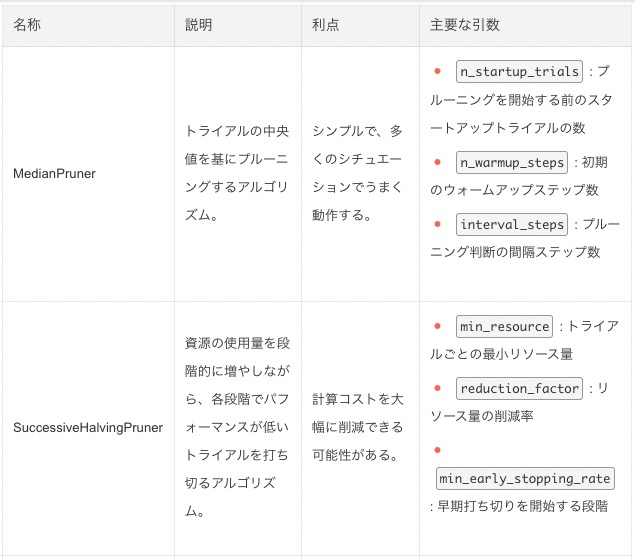

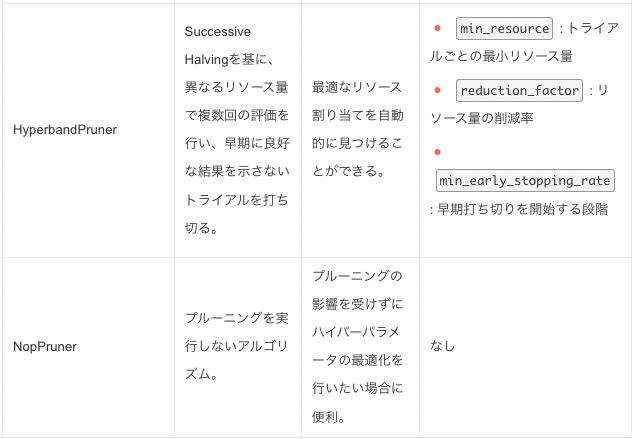

    プルーニングのタイミングは、トライアルの各ステップごとに評価されるものの、すべてのステップでプルーニングが行われるわけではありません
    Optunaでは、事前に設定されたステップ間隔や条件を満たす場合のみプルーニングの判断が行われます。

    プルーニングの基準には、そのトライアルがこれまでのトライアルの中で最も良い結果を出しているか、あるいは、
    特定の閾値を超えているかなど、様々なものが考えられます。

    Optunaでは、これらの基準をユーザが自由に設定することができ、チューニングの目的や状況に応じて最適なプルーニング戦略を選択することができます。

## デフォルトの設定
    Optunaのデフォルトのプルーニングアルゴリズムは、MedianPrunerです。

    デフォルト設定での主要な引数は以下の通りです：

    ・n_startup_trials: 5
    ・n_warmup_steps: 0
    ・interval_steps: 1

    これは、Optunaの初期化時に特定のプルーニングアルゴリズムやその引数を指定しない場合に適用される設定です。もちろん、ユーザーはこれらのデフォルト値を変更して、プルーニングの動作をカスタマイズすることができます。

## プルーニングアルゴリズムを変更する場合
    Optunaを用いたハイパーパラメータチューニングでプルーニングアルゴリズムを変更する場合、create_study関数のpruner引数を使用してプルーニングアルゴリズムを指定します。

## MedianPruner (これはデフォルトのプルーナーです)
    Optunaを用いて、scikit-learnのRandomForestClassifierのハイパーパラメータをチューニングするシンプルな例です。

    この例では、n_estimatorsとmax_depthという2つのハイパーパラメータをチューニングしています。

In [2]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.7 MB/s eta 0:00:00


In [3]:
import optuna
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 目的関数の定義
def objective(trial):
    # ハイパーパラメータのサンプリング
    n_estimators = trial.suggest_int('n_estimators', 2, 150)
    max_depth = trial.suggest_int('max_depth', 1, 32, log=True)

    # モデルの学習と評価
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth
                                )

    return cross_val_score(clf, iris.data,
                           iris.target,
                           n_jobs=-1,
                           cv=3
                          ).mean()

# データの読み込み
iris = load_iris()

# プルーニングアルゴリズムを指定して、スタディの作成
study = optuna.create_study(direction='maximize',
                            pruner=optuna.pruners.MedianPruner()
                           )
study.optimize(objective, n_trials=100)

# 最適なハイパーパラメータの表示
print(study.best_params)

[I 2024-01-28 01:04:52,310] A new study created in memory with name: no-name-627a778d-371f-4869-92be-fb66e16173c2
[I 2024-01-28 01:04:54,890] Trial 0 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 108, 'max_depth': 21}. Best is trial 0 with value: 0.9666666666666667.
[I 2024-01-28 01:04:55,347] Trial 1 finished with value: 0.9466666666666667 and parameters: {'n_estimators': 51, 'max_depth': 2}. Best is trial 0 with value: 0.9666666666666667.
[I 2024-01-28 01:04:55,820] Trial 2 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 58, 'max_depth': 18}. Best is trial 0 with value: 0.9666666666666667.
[I 2024-01-28 01:04:56,624] Trial 3 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 117, 'max_depth': 11}. Best is trial 0 with value: 0.9666666666666667.
[I 2024-01-28 01:04:57,465] Trial 4 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 120, 'max_depth': 3}. Best is trial 0 with value: 0.96666666

{'n_estimators': 108, 'max_depth': 21}


    このコードは、Irisデータセットを用いて、ランダムフォレストのハイパーパラメータをチューニングします。モデルの性能は3分割交差検証の平均精度として評価されます。

    pruner=optuna.pruners.MedianPruner()がプルーニングアルゴリズムを設定している個所です。

## SuccessiveHalvingPruner

In [4]:
study = optuna.create_study(pruner=optuna.pruners.SuccessiveHalvingPruner())
study.optimize(objective, n_trials=100)

[I 2024-01-28 01:05:50,755] A new study created in memory with name: no-name-f20ac9dc-8e07-4914-98ff-73af0ba08e28
[I 2024-01-28 01:05:51,343] Trial 0 finished with value: 0.96 and parameters: {'n_estimators': 150, 'max_depth': 4}. Best is trial 0 with value: 0.96.
[I 2024-01-28 01:05:52,312] Trial 1 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 125, 'max_depth': 17}. Best is trial 0 with value: 0.96.
[I 2024-01-28 01:05:52,534] Trial 2 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 40, 'max_depth': 15}. Best is trial 0 with value: 0.96.
[I 2024-01-28 01:05:53,303] Trial 3 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 111, 'max_depth': 17}. Best is trial 0 with value: 0.96.
[I 2024-01-28 01:05:53,771] Trial 4 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 41, 'max_depth': 25}. Best is trial 0 with value: 0.96.
[I 2024-01-28 01:05:54,754] Trial 5 finished with value: 0.94 and paramet

## HyperbandPruner

In [5]:
study = optuna.create_study(pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=100)

[I 2024-01-28 01:06:17,476] A new study created in memory with name: no-name-ae25226b-5455-4023-893a-70a6146ec9e1
[I 2024-01-28 01:06:18,090] Trial 0 finished with value: 0.9666666666666667 and parameters: {'n_estimators': 96, 'max_depth': 13}. Best is trial 0 with value: 0.9666666666666667.
[I 2024-01-28 01:06:18,442] Trial 1 finished with value: 0.96 and parameters: {'n_estimators': 46, 'max_depth': 2}. Best is trial 1 with value: 0.96.
[I 2024-01-28 01:06:18,731] Trial 2 finished with value: 0.96 and parameters: {'n_estimators': 40, 'max_depth': 9}. Best is trial 1 with value: 0.96.
[I 2024-01-28 01:06:19,136] Trial 3 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 52, 'max_depth': 2}. Best is trial 3 with value: 0.9533333333333333.
[I 2024-01-28 01:06:20,023] Trial 4 finished with value: 0.8733333333333334 and parameters: {'n_estimators': 102, 'max_depth': 1}. Best is trial 4 with value: 0.8733333333333334.
[I 2024-01-28 01:06:20,712] Trial 5 finished with 

## NopPruner (実際にはプルーニングを行わないプルーナーです)

In [6]:
study = optuna.create_study(pruner=optuna.pruners.NopPruner())
study.optimize(objective, n_trials=100)

[I 2024-01-28 01:07:01,922] A new study created in memory with name: no-name-0dc7a378-bec8-415f-8b12-3968e7673ca5
[I 2024-01-28 01:07:02,360] Trial 0 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 108, 'max_depth': 4}. Best is trial 0 with value: 0.9533333333333333.
[I 2024-01-28 01:07:02,482] Trial 1 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 27, 'max_depth': 3}. Best is trial 0 with value: 0.9533333333333333.
[I 2024-01-28 01:07:02,542] Trial 2 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 10, 'max_depth': 1}. Best is trial 2 with value: 0.9266666666666666.
[I 2024-01-28 01:07:02,985] Trial 3 finished with value: 0.96 and parameters: {'n_estimators': 109, 'max_depth': 1}. Best is trial 2 with value: 0.9266666666666666.
[I 2024-01-28 01:07:03,448] Trial 4 finished with value: 0.9533333333333333 and parameters: {'n_estimators': 120, 'max_depth': 1}. Best is trial 2 with value: 0.9266666666666666.
[I 2024

## プルーニングアルゴリズムによって、モデル精度は大きく変わるか？
    プルーニングアルゴリズムは、ハイパーパラメータチューニングの過程で、早期に低い性能を示すと予測される試行を打ち切ることを目的としています。

    そのため、プルーニングアルゴリズム自体がモデルの最終的な精度に直接的な影響を与えるものではありません。

    しかし、プルーニングを適切に使用することで、計算時間を節約し、その節約された時間やリソースを利用してさらに多くの試行を行うことが可能となり、
    結果的に最適なハイパーパラメータを見つけやすくなる可能性があります。

    具体的には、以下の点が考えられます。

    ・計算効率の向上: プルーニングにより、非効果的な試行を早期に打ち切ることで、全体のチューニング時間を短縮できます。
    ・探索の焦点: プルーニングを行うことで、有望でないハイパーパラメータの領域を避け、有望な領域にリソースを集中させることができます。

    


    しかし、プルーニングの設定やアルゴリズムの選択によっては、適切なハイパーパラメータの組み合わせが早期に打ち切られてしまうリスクも考えられます。

    そのため、プルーニングの設定や使用するアルゴリズムの選択には注意が必要です。

    要するに、プルーニングアルゴリズムがモデルの精度に直接的な大きな影響を与えるわけではありませんが、チューニングの効率性を向上させることで、
    間接的に良いハイパーパラメータを探索しやすくする効果が期待できます。

## まとめ
    プルーニングは、ハイパーパラメータチューニングの過程において、期待される結果が得られないと予測されるトライアルを早期に中断することを指します。
    このプロセスは、計算リソースの節約や全体のチューニング時間の短縮に貢献するものです。

    プルーニングを行うことで、このような非効率なトライアルを早期に打ち切り、次のトライアルに移行することができます。
    そのため、プルーニングアルゴリズム自体がモデルの最終的な精度に直接的な影響を与えるものではありません。

    しかし、プルーニングの設定やアルゴリズムの選択によっては、適切なハイパーパラメータの組み合わせが早期に打ち切られてしまうリスクも考えられます。
    そのため、プルーニングの設定や使用するアルゴリズムの選択には注意が必要です。

    とは言え、状況によってはOptunaもハイパーパラメータチューニングの処理時間は結構掛かります。

    次回は、複数の目的変数を持つチューニングについてお話しします。

    要は、多目的ベイズ最適化です。